# import 취합

### 1. DataFrame + EDA + Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import time
import re

### 2. Machine Learning

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # 데이터 나누기, 점검 및 훈련
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer # 데이터

import mglearn # 그래프

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm


---

# 1. 선형회귀분석

- hypothesis :
    * y = w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + ... + b

- 종류 :
    * 일반적인 선형회귀모델
    * 머신러닝에선 릿지, 랏세, 엘라스틱넷(릿지와 랏쏘를 결합해서 쓰는)
    * 어떤 특징이 있고, 어떤 상황에서 써야하는지 파악하는 것이 제일 중요 / 사용법, 기본 원리는 다 같음

w[0]: 0.393906  b: -0.031804


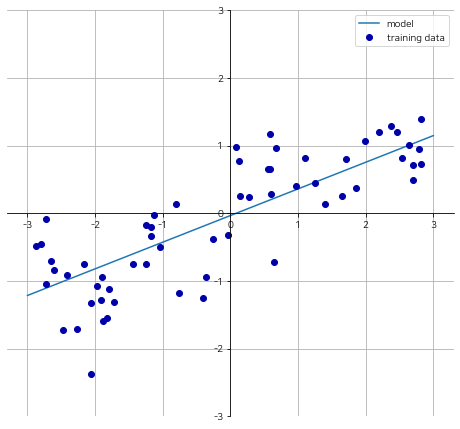

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=60)

print(X)
print(y)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]]
[-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898 -2.37364735
 -0.70117304  1.20319981  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 1) (15, 1) (45,) (15,)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print("훈련 점수:", lr.score(X_train, y_train))
print("테스트 점수:", lr.score(X_test, y_test))

# 선에 기울기와 절편을 확인해봅시다.
print("가중치:{0}, 절편:[{1}]".format(lr.coef_, lr.intercept_))

훈련 점수: 0.6700890315075756
테스트 점수: 0.6593368596863701
가중치:[0.39390555], 절편:[-0.03180434302675973]


In [14]:
# 통계분석에서 회귀분석과 머신러닝에서 회귀분석은 무엇이 다를까?
from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train)
result

# 결과는? 같아. 어떻게 쓰느냐가 차이가 나는 것이지 결과는 차이가 없음
# 머신러닝은 지속적으로 데이터를 입력받아 훈련할 수 있음. 즉, 프로그램을 만들 수 있고 개선해나갈 수 있음(자유도가 높음?)
# 통계는 한번 데이터를 입력받으면 끝! 이를 발전시킬 수 없고, 프로그램으로 만들 수도 없음(자유도가 낮음?)

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.04214926406832587, intercept_stderr=0.07819620564438917)

### 사례 1. 전기생산량과 소비량

- 귀무가설 : 전기 생산량과 소비량은 상관 관계가 없다.
- 대립가설 : 전기 생산량과 소비량은 상관 관계가 있다.

In [15]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [16]:
### 통계

result = stats.linregress(X, y)
result

# 통계에선 p-value가 중요
# 대립가설 채택
# 머신러닝에서 slope. 즉, 기울기가 제일 중요

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385306, pvalue=9.238421943157849e-05, stderr=0.07901935226531726, intercept_stderr=0.3110591892275585)

In [22]:
### 머신러닝

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1) # 2차원 배열 자료형으로 바꿔주기

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("설명력 : {}".format(lr.score(X_arr, y)))

기울기 : [0.49560324], 절편 : 0.9195814280689416
설명력 : 0.7973123992441478


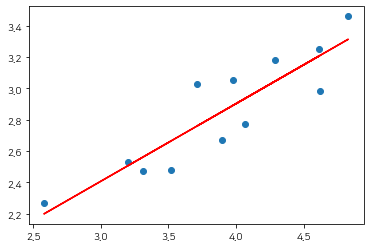

In [19]:
### 기울기와 절편을 이용해 회귀선을 그려봅시다.

plt.scatter(X, y)
plt.plot(X, lr.coef_*X+lr.intercept_, c='red')

In [23]:
#### 생산량이 5일 때 사용량은 얼마나 될까?

exp = lr.coef_ * 5 + lr.intercept_
exp

array([3.39759761])

In [24]:
#### lr.predict()

lr.predict([[5]])

array([3.39759761])

### 사례 2. 보스턴 주택 가격

In [10]:
### target을 보면 이건 회귀분석

boston = load_boston()
boston

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [3]:
boston = load_boston()

X_train = train_test_split(boston.data, boston.target, random_state=0)[0]
print(X_train.shape)

(379, 13)


In [7]:
print(boston.feature_names)
print(len(boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

# 과적합.
# 선형회귀분석에선 과적합

기울기 : [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01], 절편 : 36.93325545711945
훈련 설명력 : 0.7697699488741149
테스트 설명력 : 0.6354638433202122


In [11]:
#### 변수가 많으면 과대적합 가능성이 많아진다.
#### 변수가 적으면 과소적합 가능성이 많아진다.

from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 104) (127, 104) (379,) (127,)


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

기울기 : [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01 -1

In [ ]:
### PPT엔 주제, 분석내용, 결과
### 코드는 따로. ipynb
### 프로젝트 기획서(미리 낸 것)

# 릿지와 라쏘
- 선형회귀분석으로 과대적합이 나오면?
- 릿지 먼저
- 라쏘는 그 다음
- 이유는 릿지는 모든 변수를 일단 활용
- 라쏘는 오차범위 밖의 변수는 0으로 만들어버림
- 변수는 가능한 사용하는 쪽으로 하는게 좋기 때문

---

# 2. 릿지회귀분석(ridge)

- L2 규제(regularization) = Norm 2 방식(최단거리)으로 규제
    + 너무 복잡하니 조금 단순하게 만들어주겠다.
- MSE(Mean Square Error : 평균제곱오차(잔차제곱합을 의미)) 항에 Penelty 추가 // 1/n * sum((yi - yi^)^2 for i in n) = mean(yi - yi^) + "alpha" * sum((wi^2) for i in n)
    + 회귀선에서 많이 벗어나면 패널티를 준다
    + 실제값에서 예측값을 뻬고 제곱을 해준 것의 평균(MSE)
    + 가중치의 제곱의 합(L2 규제)
- "alpha"를 크게 하면 Penelty가 커지고 "alpha"를 작게 하면 Penelty가 줄어든다.
    + "alpha"가 유일한 하이퍼 파라미터(조절값)
- 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과 -> 과대적합 방지에 유리?

In [3]:
from sklearn.linear_model import Ridge

In [14]:
#### 앞에서 한 이 데이터를 사용해보겠음. 얼마나 차이가 나는지 확인하기 위해
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

(379, 104) (127, 104) (379,) (127,)
기울기 : [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [17]:
ridge = Ridge().fit(X_train, y_train) #alpha = 1.0이 디폴트. Ridge()에 넣어주면 됨.

print("릿지")
print("훈련 설명력 : {}".format(ridge.score(X_train, y_train)))
print("테스트 설명력 : {}".format(ridge.score(X_test, y_test)))

print('='*50)

print("선형회귀")
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

릿지
훈련 설명력 : 0.8857966585170941
테스트 설명력 : 0.7527683481744751
선형회귀
훈련 설명력 : 0.9520519609032726
테스트 설명력 : 0.6074721959665756


In [31]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) #alpha = 1.0이 디폴트. Ridge()에 넣어주면 됨.

print("릿지")
print("훈련 설명력 : {}".format(ridge01.score(X_train, y_train)))
print("테스트 설명력 : {}".format(ridge01.score(X_test, y_test)))

print('='*50)

print("선형회귀")
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

릿지
훈련 설명력 : 0.928227368500199
테스트 설명력 : 0.7722067936479811
선형회귀
훈련 설명력 : 0.9520519609032726
테스트 설명력 : 0.6074721959665756


In [32]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train) #alpha = 1.0이 디폴트. Ridge()에 넣어주면 됨.

print("릿지")
print("훈련 설명력 : {}".format(ridge1.score(X_train, y_train)))
print("테스트 설명력 : {}".format(ridge1.score(X_test, y_test)))

print('='*50)

print("선형회귀")
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

릿지
훈련 설명력 : 0.8857966585170941
테스트 설명력 : 0.7527683481744751
선형회귀
훈련 설명력 : 0.9520519609032726
테스트 설명력 : 0.6074721959665756


In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #alpha = 1.0이 디폴트. Ridge()에 넣어주면 됨.

print("릿지")
print("훈련 설명력 : {}".format(ridge10.score(X_train, y_train)))
print("테스트 설명력 : {}".format(ridge10.score(X_test, y_test)))

print('='*50)

print("선형회귀")
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

릿지
훈련 설명력 : 0.7882787115369615
테스트 설명력 : 0.635941148917731
선형회귀
훈련 설명력 : 0.9520519609032726
테스트 설명력 : 0.6074721959665756


(-25.0, 25.0)

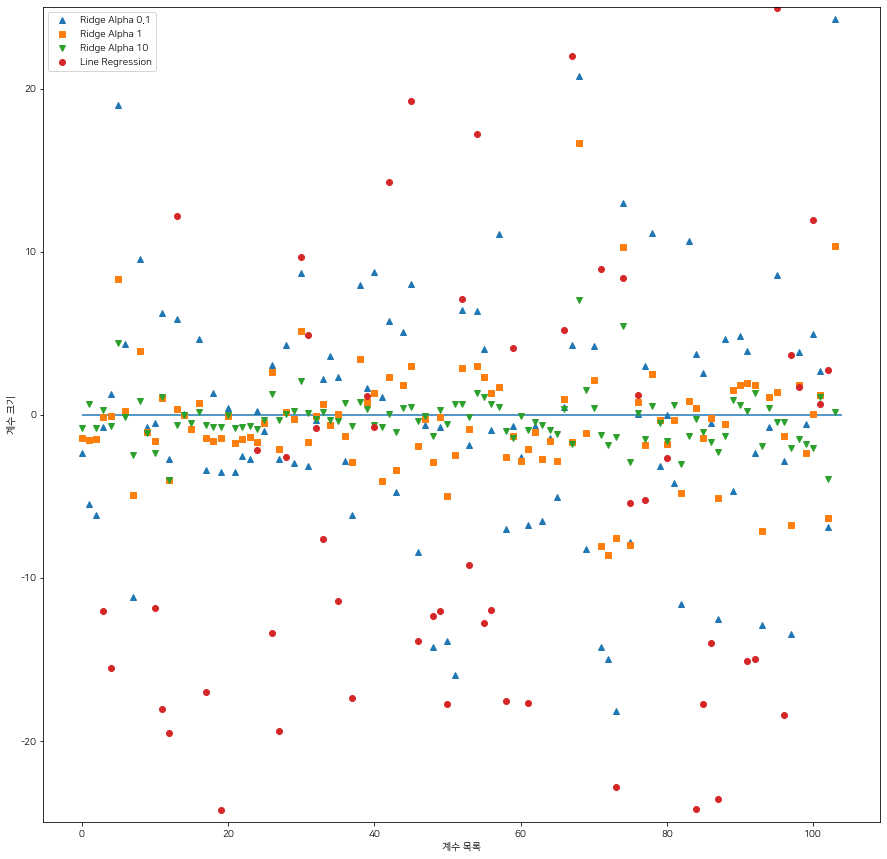

In [36]:
#### 그래프로 그려서 비교해보자
plt.figure(figsize=(15,15))

plt.plot(ridge01.coef_, "^", label = "Ridge Alpha 0.1")
plt.plot(ridge1.coef_, "s", label = "Ridge Alpha 1")
plt.plot(ridge10.coef_, "v", label = "Ridge Alpha 10")
plt.plot(lr.coef_, "o", label = "Line Regression")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

#### 가중치 값의 오차가 커지면 모델은 복잡해진다.
#### 가중치 값의 오차가 작으면 모델은 단순해진다.
#### 

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

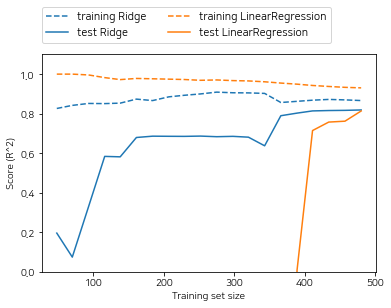

In [37]:
#### 릿지의 경우, 알파를 1로 지정
#### 1. 선형회귀는 데이터가 400개 정도 되어야 결과가 나오기 시작
#### 2. 훈련 데이터가 많아지면 선형이든 회귀든 같은 결과물
#### 3. 다만, 데이터 수가 적을 땐 릿지가 압도적으로 성능이 좋다.
#### 4. 
mglearn.plots.plot_ridge_n_samples()

# 3. 라쏘(Lasso) 회귀모델 // 계산식에서 자동으로 변수를 골라냄.

- L1 규제(regularization) = Norm 1 방식(이동한 거리의 합))으로 규제
    + 너무 복잡하니 조금 단순하게 만들어주겠다.
- MSE(Mean Square Error : 평균제곱오차(잔차제곱합을 의미)) 항에 Penelty 추가 // 1/n * sum((yi - yi^)^2 for i in n) = mean(yi - yi^) + "alpha" * sum(|wi| for i in n)
    + 회귀선에서 많이 벗어나면 패널티를 준다
    + 실제값에서 예측값을 뻬고 제곱을 해준 것의 평균(MSE)
    + 가중치에 거리 절대값의 합을 곱해준다.(L1 규제)
    + 릿지와의 차이? 거리를 절대값으로 해주면 0도 생김. 이렇게 되면 관련성이 약하거나 없는 변수는 자동으로 지워주는 특성을 지니게 된다.  
- "alpha"를 크게 하면 Penelty가 커지고 "alpha"를 작게 하면 Penelty가 줄어든다.
    + "alpha"가 유일한 하이퍼 파라미터(조절값)
- 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과 -> 과대적합 방지에 유리?

In [4]:
from sklearn.linear_model import Lasso

In [44]:
# alpha값 1
lasso = Lasso().fit(X_train, y_train)

print("훈련 설명력 : {}".format(lasso.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lasso.score(X_test, y_test)))

#0.29? 왜 이런 결과가 나온거야? 확인해봐야 # 사용된 변수가 몇개인지 확인해봅시다.
print("사용한 변수의 수: {}".format(np.sum(lasso.coef_ != 0)))


훈련 설명력 : 0.29323768991114596
테스트 설명력 : 0.20937503255272272
사용한 변수의 수: 4


In [45]:
# 왜 np.sum을 해주나?
# bull형은 true와 false로
# array에서 true는 1, false는 0
# len으로 해버리면 갯수를 모두 계산해 104가 나옴
lasso.coef_ != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [54]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)

print("훈련 설명력 : {}".format(lasso001.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lasso001.score(X_test, y_test)))

#0.29? 왜 이런 결과가 나온거야? 확인해봐야 # 사용된 변수가 몇개인지 확인해봅시다.
print("사용한 변수의 수: {}".format(np.sum(lasso001.coef_ != 0)))


훈련 설명력 : 0.8961122320864717
테스트 설명력 : 0.7677995670886715
사용한 변수의 수: 32


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [55]:
lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train)

print("훈련 설명력 : {}".format(lasso00001.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lasso00001.score(X_test, y_test)))

#0.29? 왜 이런 결과가 나온거야? 확인해봐야 # 사용된 변수가 몇개인지 확인해봅시다.
print("사용한 변수의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 설명력 : 0.9420931515237063
테스트 설명력 : 0.6976541391663642
사용한 변수의 수: 100


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


(-25.0, 25.0)

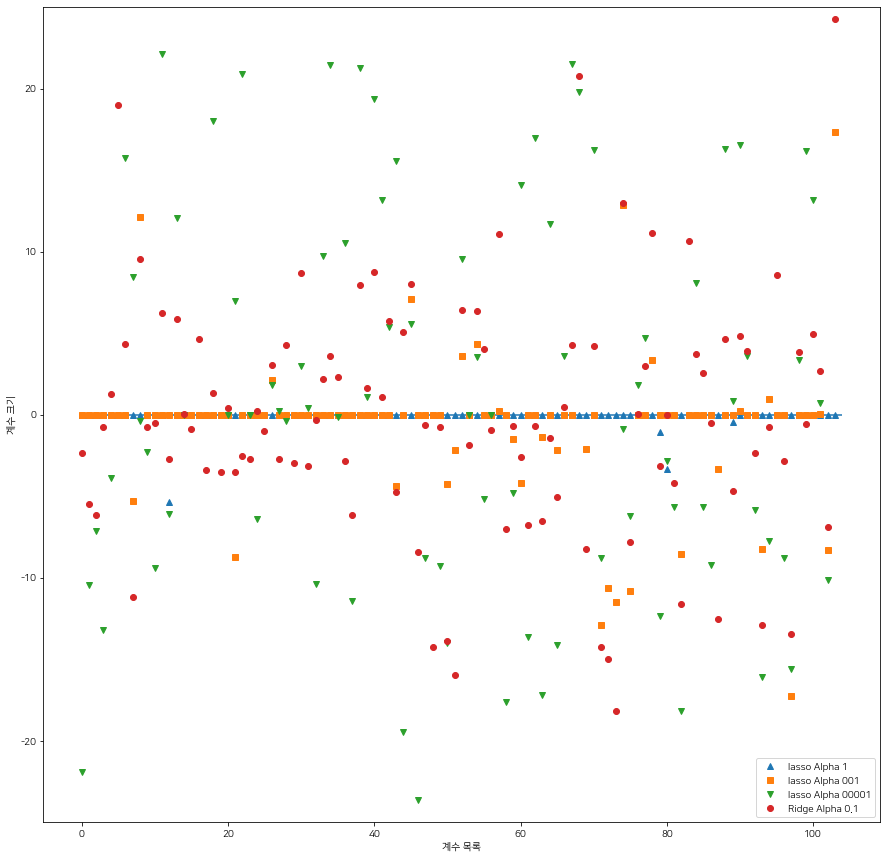

In [58]:
plt.figure(figsize=(15,15))

plt.plot(lasso.coef_, "^", label = "lasso Alpha 1")
plt.plot(lasso001.coef_, "s", label = "lasso Alpha 001")
plt.plot(lasso00001.coef_, "v", label = "lasso Alpha 00001")
plt.plot(ridge01.coef_, "o", label = "Ridge Alpha 0.1")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lasso.coef_))
plt.ylim(-25, 25)


In [57]:
#### 1은 그냥 일직선. 규제가 너무 심했던 것으로 이해하면 됩니다.
#### 0.01은 일직선에 있으면서도 어느 정도 분산된 모습을 보임.
#### 0.001은 완전 자유롭게 돌아다님. 그렇기 때문에 모델은 엄청나게 복잡해져요~
#### 지워진 변수는 중요도가 아니라 오차범위가 크고 작다 느낌으로 이해하길 바람

# 4. 엘라스티넷 회귀모델

+ 릿지와 라쏘의 특성 모두 가짐 = L1, L2 방식을 다 쓴다는 것을 의미
+ 반대로 말하면 무겁고 복잡해
+ 릿지, 라쏘로 답이 안나올 때 최후의 방법으로 쓰는걸 추천

---

### a. 예제

#### 1) 키에 따라서 몸무게가 얼마인지 예측하는 프로그램
- 키가 70 inch인 사람의 몸무게는 얼마인가?

In [63]:
df = pd.read_csv("data/heights.csv")
df

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


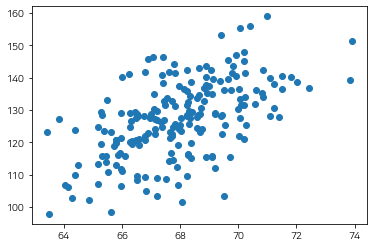

In [79]:
# 그래프로 보면 우상향하는 모습을 보임
plt.plot(df['height'], df['weight'], 'o')

In [77]:
# data 'height'는 2차원 배열로, target인 'weight'는 1차원 배열로 만들어 전달
arr1 = np.array(df['height'])
arr2= np.array(df['weight'])
arr1 = arr1.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(arr1, arr2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))
print("예측값 : {}".format(lr.predict([[70]])))


(150, 1) (50, 1) (150,) (50,)
기울기 : [3.41319698], 절편 : -104.37953740484572
훈련 설명력 : 0.295498979207678
테스트 설명력 : 0.36223105588467075
예측값 : [134.5442513]


#### BOSTON 집값 예측해보기

In [ ]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""

In [88]:
boston = load_boston()
boston.target

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [90]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [91]:
arr1 = np.array(df['RM']).reshape(-1, 1)
arr1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [102]:
X_train, X_test, y_train, y_test = train_test_split(arr1, boston.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))
# 단위가 1,000달러이므로
print("예측값 : {}".format(lr.predict([[4]])*1000))


(379, 1) (127, 1) (379,) (127,)
기울기 : [9.31294923], 절편 : -36.180992646339206
훈련 설명력 : 0.48752067939343646
테스트 설명력 : 0.4679000543136781
예측값 : [1070.80425618]


<AxesSubplot:xlabel='RM'>

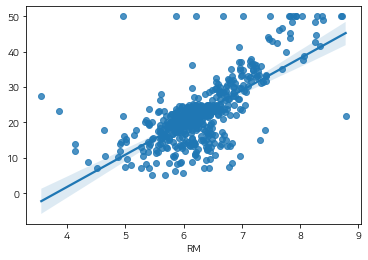

In [93]:
sns.regplot(x=df['RM'], y=boston.target)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


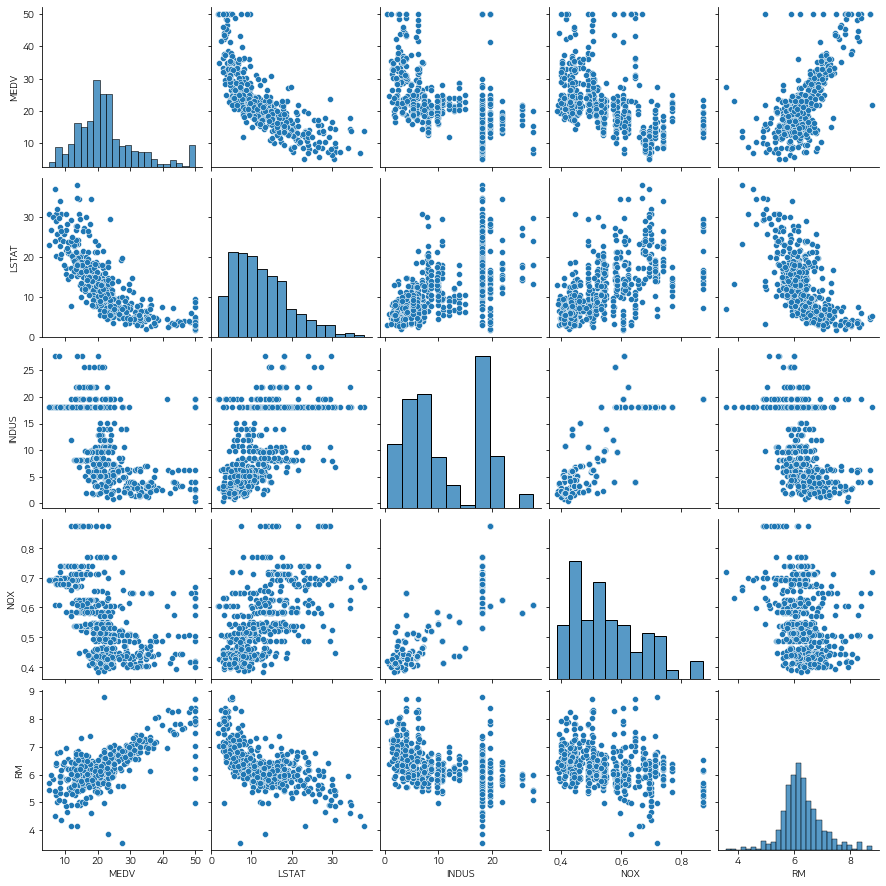

In [94]:
#### 강사님 방식


df1 = pd.DataFrame(boston.data, columns=boston.feature_names)
df1['MEDV'] = boston.target


#### LSTAT은 하위계층비율, RM은 방 계수.
#### 집 값에 영향을 미칠 수 있는 가능성이 높은 건 방의 갯수로 봐야.. 결과 해석 연습
sns.pairplot(df1[["MEDV", "LSTAT", "INDUS", "NOX", "RM"]], size=2.5)

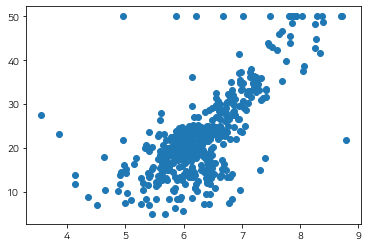

In [95]:
plt.scatter(df1['RM'], df1['MEDV'])

<AxesSubplot:>

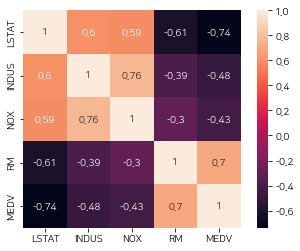

In [99]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
heat = np.corrcoef(df1[cols].T)
heat

sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=T)


In [124]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

boston_model = LinearRegression()
boston_model.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(boston_model.coef_, boston_model.intercept_))
print("훈련 설명력 : {}".format(boston_model.score(X_train, y_train)))
print("테스트 설명력 : {}".format(boston_model.score(X_test, y_test)))
# 입력값이 13개이어야 함!!!!!! 결국 단일선형회귀분석으로
# 다른 변수 디폴트값으로 입력하고 방만 입력하게 하는 것도 하나의 방법
# print("예측값 : {}".format(boston_model.predict([[]])

(379, 13) (127, 13) (379,) (127,)
기울기 : [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01], 절편 : 36.93325545711945
훈련 설명력 : 0.7697699488741149
테스트 설명력 : 0.6354638433202122


ValueError: X has 1 features, but LinearRegression is expecting 13 features as input.

# 5. 로지스틱 회귀분석

- 선형회귀분석 머신러닝은 가중치를 찾는 훈련이라 보면 된다.
- MSE를 통해 페널티를 주어 오차범위 밖으로 튀어나가는 변수 가중치를 잡아준다.
- 이 후에 미분을 통해 가중치가 최저가 되는 부분을 찾는다.

+ 로지스틱 회귀분석은 2차 방정식 통한 곡선 방정식
+ 절반 딱 나눠서 Yes or No로 결론 짓는 방법

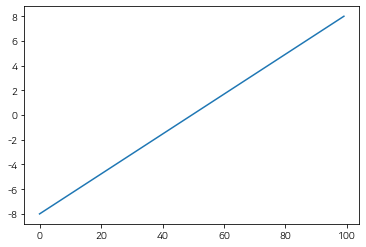

In [144]:
#### Sigmoid 그래프 그리기

X = np.linspace(-8, 8, 100)
plt.plot(X)

In [145]:
#### 곡선으로 틀어줘야 : 로지스틱 회귀분석 정식 공식은 y= (1/(e^x+1)) + b

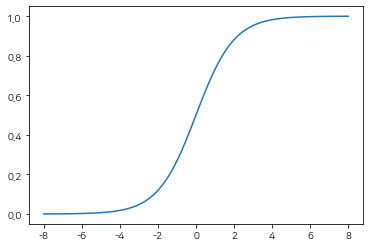

In [152]:
X = np.linspace(-8, 8, 100)
# 최소값과 최대값이 커지지 않도록 막아놓은 것
# 최소값은 0보다 작지 않게, 최대값은 1보다 크지 않게
# 데이터가 어느 위치에 있느냐?에 따라 예/아니오로 단순하게 결론
plt.plot(X, 1/ (1+np.exp(-X)))


(426, 30) (143, 30) (426,) (143,)
훈련용 : 0.9577464788732394
테스트 : 0.9230769230769231


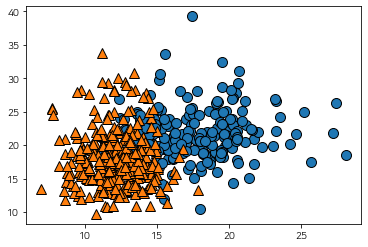

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print("훈련용 :", clf.score(X_train, y_train))
print("테스트 :", clf.score(X_test, y_test))

mglearn.discrete_scatter(cancer.data[:, 0], cancer.data[:, 1], cancer.target)
# mglearn.plots.plot_2d_separator(clf, cancer.data)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

print("훈련용 설명계수(R^2) :", reg.score(X_train, y_train))
print("테스트용 설명계수(R^2) :", reg.score(X_test, y_test))
print("테스트용을 이용한 예측결과:", reg.predict(X_test))

(30, 1) (10, 1) (30,) (10,)
훈련용 설명계수(R^2) : 0.8194343929538755
테스트용 설명계수(R^2) : 0.8344172446249605
테스트용을 이용한 예측결과: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print(knn.score(X_test, y_test))
pred = knn.predict(X_test)
print(np.mean(pred == y_test))

(112, 4) (38, 4) (112,) (38,)
1.0
1.0


In [4]:
X, y = mglearn.datasets.make_forge()

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


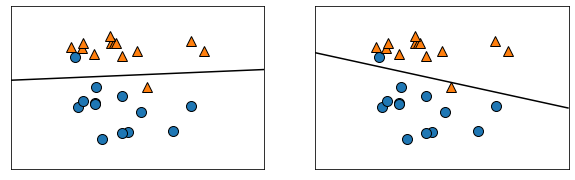

In [7]:
#### from sklearn.linear_model import LogisticRegression
#### from sklearn.svm import LinearSVC

# SVC는 가장 어렵고 복잡한 알고리즘. 다만, 성능이 가장 좋다고 알려져있다.

clf1 = LinearSVC(C=1).fit(X, y) #C는 하이퍼 파라미터
clf2 = LogisticRegression().fit(X, y)

_, axes = plt.subplots(1, 2, figsize = (10, 3))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
mglearn.plots.plot_2d_separator(clf1, X, ax=axes[0])

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
mglearn.plots.plot_2d_separator(clf2, X, ax=axes[1])

# KNN은 데이터가 많으면 속도가 엄청 느려
# SVC는 경계선 구분으로 분류하다보니 KNN보다 데이터 크기에 속도 저하 영향을 덜 받음


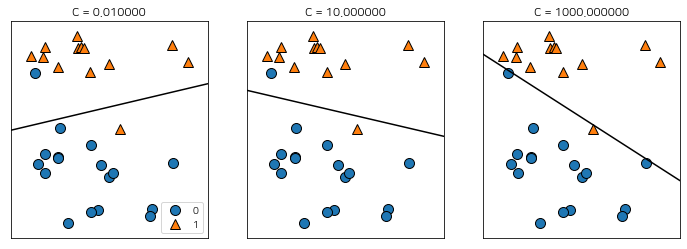

In [8]:
mglearn.plots.plot_linear_svc_regularization()
# c=0.01 // c = 10 // c = 100
# c가 커질수록 모델은 복잡해진다. (어떻게든 안틀리려고 선의 기울기를 맞춘다.)


In [26]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logreg1000 = LogisticRegression(C=1000, penalty="l2", max_iter=10000).fit(X_train, y_train)

print("훈련 점수 : ", logreg1000.score(X_train, y_train))
print("테스트 점수 : ", logreg1000.score(X_test, y_test))

(426, 30) (143, 30) (426,) (143,)
훈련 점수 :  0.9882629107981221
테스트 점수 :  0.972027972027972


In [27]:
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000).fit(X_train, y_train)

print("훈련 점수 : ", logreg001.score(X_train, y_train))
print("테스트 점수 : ", logreg001.score(X_test, y_test))

훈련 점수 :  0.9460093896713615
테스트 점수 :  0.972027972027972


In [28]:
logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, y_train)

print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.965034965034965


(-5.0, 5.0)

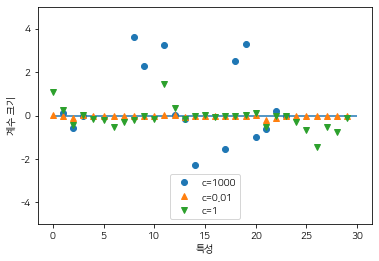

In [29]:
plt.plot(logreg1000.coef_.T, "o", label="c=1000")
plt.plot(logreg001.coef_.T, "^", label="c=0.01")
plt.plot(logreg.coef_.T, "v", label="c=1")


plt.legend()
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

In [33]:
logreg_l1 = LogisticRegression(C=1, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train)

print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.951048951048951


In [32]:
logreg_l1_1000 = LogisticRegression(C=1000, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train)

print("훈련 점수 : ", logreg_l1_1000.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1_1000.score(X_test, y_test))

훈련 점수 :  0.9976525821596244
테스트 점수 :  0.9370629370629371


In [34]:
logreg_l1_001 = LogisticRegression(C=0.01, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train)

print("훈련 점수 : ", logreg_l1_001.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1_001.score(X_test, y_test))

훈련 점수 :  0.9107981220657277
테스트 점수 :  0.951048951048951


---
### (2). KNN, Logestic Regression, LinearSVC 성능 비교

- 이 결과가 항상 그렇다는 의미 X
- 데이터에 따라 달라질 수 있다. 그래서 가능한 많은 알고리즘을 사용해봐야 한다.

In [35]:
cancer.data.shape

(569, 30)

In [36]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
cancer.target_names
np.bincount(cancer.target)

array([212, 357])

In [41]:
#### Logestic Reg

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, y_train)
lr_score = logreg.score(X_train, y_train)
print(lr_score)


0.9624413145539906


In [43]:
#### LinearSVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

SVC = LinearSVC(max_iter=10000, dual=False).fit(X_train, y_train)
SVC_score = SVC.score(X_train, y_train)
print(SVC_score)

0.9741784037558685


In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

KNN = KNeighborsClassifier().fit(X_train, y_train)
KNN_score = KNN.score(X_train, y_train)
print(KNN_score)

0.9342723004694836


([<matplotlib.axis.XTick at 0x7fd4ab3954c0>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, 

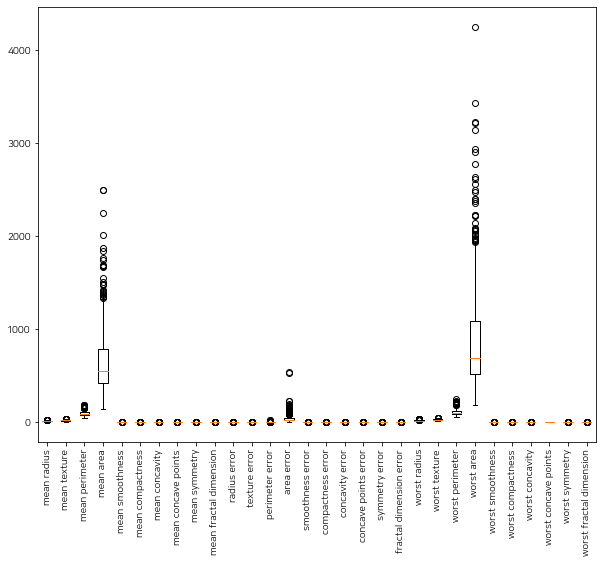

In [47]:
#### 이상치가 있으면? 확인 후 표준화로 전처리 해줘야

plt.figure(figsize=(10,8))

plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [48]:
m = cancer.data.mean(axis=0)
sd = cancer.data.std(axis=0)

data1 = (cancer.data - m) / sd

([<matplotlib.axis.XTick at 0x7fd4d8e1ac70>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, 

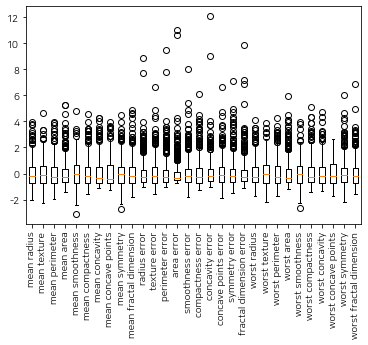

In [49]:
plt.boxplot(data1)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [50]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, y_train)
lr_score = logreg.score(X_train, y_train)
print(lr_score)


0.9859154929577465


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

SVC = LinearSVC(max_iter=10000, dual=False).fit(X_train, y_train)
SVC_score = SVC.score(X_train, y_train)
print(SVC_score)

0.9882629107981221


In [52]:
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

KNN = KNeighborsClassifier().fit(X_train, y_train)
KNN_score = KNN.score(X_train, y_train)
print(KNN_score)

0.9788732394366197


In [53]:
### C값 조정

logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000).fit(X_train, y_train)
lr_score = logreg001.score(X_train, y_train)
print(lr_score)

0.9507042253521126


In [55]:
SVC001 = LinearSVC(C=0.01, max_iter=10000, dual=False).fit(X_train, y_train)
SVC_score = SVC001.score(X_train, y_train)
print(SVC_score)

0.9835680751173709


# 3. 다중클래스 분류

- 2진 분류 : Yes or No // 개 or 고양이
- 다중클래스 분류 : 개, 고양이, 말, 호랑이 ...
- 기본적으로 라이브러리, 함수는 다 2진 분류만 제공
- 2진 분류를 여러번 사용해서 ... (이번 편 주제)
- 로지스틱 회귀분석은 다중클래스 기능을 제공한다. 그래서, 딥러닝에서도 기본적으로 활용된다.
    * softmax : 여러 개의 분류를 하나의 확률로 제공. 그래서 다중클래스 분류 가능

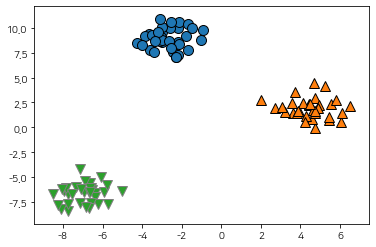

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


In [57]:
model = LinearSVC().fit(X,y)
print(model.coef_)

[[-0.1749178   0.23140392]
 [ 0.47621179 -0.06937533]
 [-0.18913908 -0.20400526]]


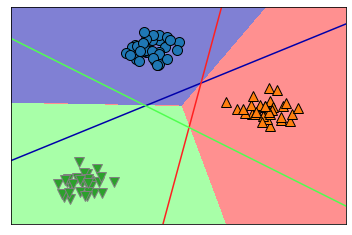

In [61]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
xline = np.linspace(-15, 15)


for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors): #zip은 각각 변수에 반복문을 지정해주기 위해 사용하는 것
    plt.plot(xline, -(coef[0]*xline+intercept)/coef[1], c=color)

mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=0.5)

---
# 평가

- 정확도(Accuracy) : 지금까지 판단 기준이었음. 정확히 맞추는지
- 오차행렬(Confusion Matrix) : 무엇을 틀렸는지를 평가하는게 중요할 때
- 정밀도(Precision)
- 재현율(Recall)
- F1 Score
- ROC, AUC

### 정확도
+ 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [6]:
#### 정확도만 측정했을 때 발생하는 문제 사례(유명)

from sklearn.datasets import load_digits
#mnist -> 0부터 9까지 쓴 손글씨 이미지를 정확한 숫자로 판단하기 위한 훈련 데이터의 일부

digits = load_digits()
print(digits.data.shape)
print(digits.data)
print(digits.target)
# 005...000 -> 0
# 000...1000 -> 1
# ...

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


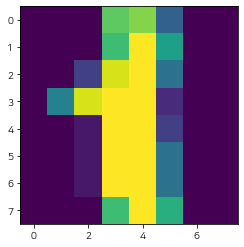

In [7]:
digits.target == 7

plt.imshow(digits.data[1].reshape(8, 8)) #왜? 1797 x 64에서 64가 이미지 크기를 의미한다. 따라서, 8행 8열이 하나의 아마자 데이터이므로 

In [8]:
y = (digits.target == 7).astype(int)
np.unique(y)
np.bincount(y)
#array([1618,  179])
#여기서 7이 아니야! 라고 모델 세워도 엄청난 정확도 자랑할 것!
#정밀도와 재현율도 반드시 신경써야하는 이유.

array([1618,  179])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)
print(len(X_train), len(X_test))
print(np.bincount(y_test))

1347 450
[409  41]


In [10]:
# 7인지 7이 아닌지 예측하는 프로그램 만들어봅시다.

from sklearn.base import BaseEstimator #우리가 지금까지 했던 것들이 같은 부모클래스에서 나와서 방식이 비슷했던 것. 그리고 그 부모클래스는 이거!!

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [12]:
clf = MyFakeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

### 훈련을 하지도 않았는데 90%?
### target이 false로 너무 기울어져있어서
### target 수가 중요함!
### 맞춘 것만 보는 정확도, 맹점이 있음. 틀린 것도 판단 기준에...

정확도 :  0.9088888888888889


### Confusion Matrix
- 이진 분류의 예측이 얼마인지?
- 어떠한 유형의 오류가 발생했는지 함께 나타내는 지표

* TN, FP, FN TP
* 책 152p. 에서 확인 가능

In [82]:
#### Negative(0), Positive(1)은 내가 관심있는 곳이 어딘가에 따라 달라진다.
#### 예) 암에 걸린 사람에 관심이 있다면 암에 걸린 사람이 Pos(1), 안걸린 사람은 Neg(0)가 된다.

#### 실제클래스 Negative -> 예측클래스 Negative = TN(True Neagative)
#### 실제클래스 Negative -> 예측클래스 Positive = FP(False Positive)
#### 실제클래스 Positive -> 예측클래스 Negative = FN(False Neagative)
#### 실제클래스 Positive -> 예측클래스 Positive = TP(True Positive)


In [13]:
# 7이라고 맞추는 것이 중요한데, 7이라고 맞춘 것이 하나도 없다.
# Positive : 7 ,, Negative : 7 이 외의 값 
# TN // FP
# FN // TP

confusion_matrix(y_test, pred)

array([[409,   0],
       [ 41,   0]])

### 정밀도와 재현율
- Positive (TP, FP, FN) 에 좀 더 집중을 한
- 정밀도 = TP / (FP + TP) :: 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
- 재현율 = TP / (FN + TP) :: 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
- 재현율은 민감도(sensitive) or TPR(Ture Positive Rate)라고 한다.

+ 정밀도가 더 중요한 경우 : 실제 Negative인 값을 Positive로 잘못 판단하면 큰일이 나는 경우(스팸메일 분류)
+ 재현율이 더 중요한 경우 : 실제 Positive인 값을 Negative로 잘못 판단하면 큰일이 나는 경우(암 판단, 보험사긴 판단)

In [24]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
#### 결측치 처리 함수
def fillna(df):
    df['Age'].fillna(df["Age"].mean(), inplace=True)
    df['Cabin'].fillna("N", inplace=True)
    df['Embarked'].fillna("N", inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#### 필요없는 변수 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
    return df

#### 레이블 인코딩 :: 문자는 숫자로
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ["Cabin", "Embarked", "Sex"]

    for i in features:
        le = LabelEncoder()
        le = le.fit(df[i])
        df[i] = le.transform(df[i])

    return df

#### 한번에 하기 위해서
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [27]:
X = df.drop('Survived', axis=1)
transform_features(X)
#X = np.array(X).reshape(-1, 1)

y = df['Survived']
#y = np.array(y)

In [28]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=.2)

In [31]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [34]:
pred = lr.predict(X_test)

In [40]:
# 정밀도와 재현율은 가급적이면 비슷한 값을 가지는게 제일 좋다.
# from sklearn.metrics import precision_score, recall_score

c_matrix = confusion_matrix(y_test, pred)
print("오차행렬 : \n", c_matrix)

acc = accuracy_score(y_test, pred)
print("정확도 : ", acc)

pre = precision_score(y_test, pred)
print("정밀도 :", pre)

recall = recall_score(y_test, pred)
print("재현율 :", recall)

오차행렬 : 
 [[104  14]
 [ 13  48]]
정확도 :  0.8491620111731844
정밀도 : 0.7741935483870968
재현율 : 0.7868852459016393


### 다중분류에서의 Confusion Matrix

<AxesSubplot:>

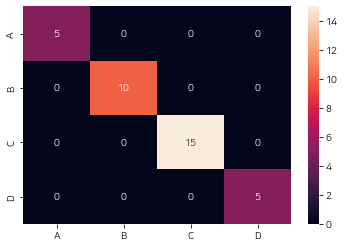

In [49]:
# 실제 A값을 A라고 예측한 것이 5개
# 실제 B값을 B라고 예측한 것이 10개
# ...

# TP, FP, FP, FP
# FP, TP, FP, FP
# ...
# TN, FN으로 봐도 됨. 다중분류에선 Negative, Positive 2개로 구분하는 것이 아니기 때문에...

data = [[5, 0, 0, 0],
        [0, 10, 0, 0],
        [0, 0, 15, 0],
        [0, 0, 0, 5]]

df = pd.DataFrame(data, index = [i for i in "ABCD"], columns=[i for i in "ABCD"])
df

#오차행렬표를 가장 효과적으로 보여줄 수 있는 시각그래프? 히트맵!
sns.heatmap(df, annot=True)

<AxesSubplot:>

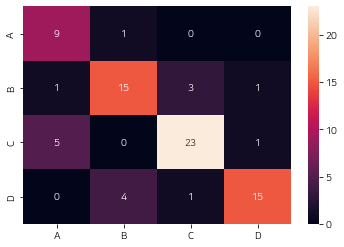

In [50]:
# 실제와 조금 더 가까운 다중분류 오차행렬표
data = [[9, 1, 0, 0],
        [1, 15, 3, 1],
        [5, 0, 23, 1],
        [0, 4, 1, 15]]

df = pd.DataFrame(data, index = [i for i in "ABCD"], columns=[i for i in "ABCD"])


sns.heatmap(df, annot=True)

# 다중분류에서 정확도, 정밀도, 재현율 빠르게 파악하기 위해선 정규화 필요.

In [51]:
#### Normalization

total = np.sum(data, axis=1)
data = data / total[:, None]
data

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.17241379, 0.        , 0.79310345, 0.03448276],
       [0.        , 0.2       , 0.05      , 0.75      ]])

<AxesSubplot:>

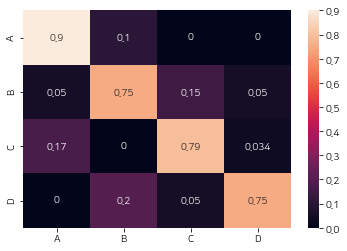

In [53]:
df = pd.DataFrame(data, index = [i for i in "ABCD"], columns=[i for i in "ABCD"])
df
sns.heatmap(df, annot=True)

In [54]:
y_true=[2,0,2,2,0,1]
y_pred=[0,0,2,2,0,2]

c_matrix = confusion_matrix(y_true, y_pred)
c_matrix

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### F1 Score(교재 168p.)

- 재현율과 정밀도의 조화평균
- 2 / (1/재현율) + (1/정밀도) = 2 * (재현율 * 정밀도) / (재현율 + 정밀도)
- 조화평균? : 평균은 가중치가 생긴다. 이를 방지하기 위한 평균계산법
- 재헌율? 정밀도? 그냥 F1 Score 봐라. 이게 결론이다.

In [56]:
y_true = [0,0,0,1,1,0,0]
y_pred = [0,0,0,0,1,1,1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



### ROC와 AUC

- 평가지표를 시각화
- 2진 분류에서만 사용 가능

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [64]:
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)

In [65]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [66]:
c_mat = confusion_matrix(y, y_hat)
c_mat

array([[477,  20],
       [ 28, 475]])

In [67]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       497
           1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(0, 0.5, 'True Positive Rate(Recall')

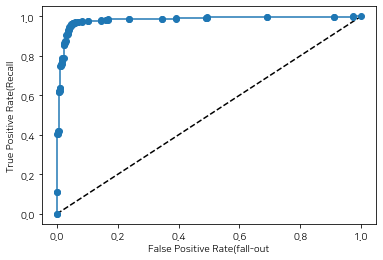

In [71]:
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, 'o-', label = "LogisticRegression")
plt.xlabel("False Positive Rate(fall-out")
plt.ylabel("True Positive Rate(Recall")

#1번째 array == fpr(False Positive Ratio) FP 비율 = Positive로 잘못 예측한 값의 비율
#2번째 array == tpr(True Positive Ratio) TP 비율 = Positive로 잘 예측한 값의 비율
#3번째 array == 기준선 값

### 예제1) Titanic

+ 성능을 제대로 측정했는가?에 대한 관점으로 진행
+ Kaggle에 Titanic 예제로 푼 케이스 많아. 어떻게 처리하는지 보는 것만으로 공부됨. 찾아볼 것


#### 1. 전처리
- more detail

In [9]:
df = pd.read_csv("data/train.csv")

In [10]:
### 머신러닝은 변수 데이터 형태가 숫자여야 한다.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
cols_to_keep = ['Survived', 'Age', 'Fare']

In [12]:
# Pclass == 머신러닝에선 숫자가 큰 것이 더 좋은 것으로 판단.
# ONEHOT ENCODING으로 쓰자.
# 방법은 sklearn의 원핫인코딩 or 판다스의 get_dummies
# 인코딩을 하는 이유는 머신러닝 성능 위해서

dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [13]:
# Sex도 원핫인코딩으로 처리

dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
# 지금까지 전처리한 class
# 성별은 남/녀 둘로만 나뉘니 하나만 판단하면 나머지는 알아서 판단됨. 고로 하나만 붙여주면 된다.

df1=df[cols_to_keep].join(dummy_class.loc[:, "Pclass_1":])
df2 = df1.join(dummy_sex.loc[:, "Sex_female"])
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    uint8  
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 24.5 KB


In [ ]:
# survived는 target. target을 빼줍니다.
# My Way

target = df2["Survived"]
del df2["Survived"]

# 아직 전처리가 완전히 끝난 것이 아니니 이 방법은 전처리 후 마지막에 하는 것이 좋겠다.

In [19]:
train_col = df2.columns[1:]
train_col

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'], dtype='object')

In [21]:
#### 결측치 확인
df2[train_col].isnull()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    uint8  
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 24.5 KB


In [23]:
#### 결측치를 완전히 제거하려면?
# df2[train_col].dropna()
# df1["Survived"].dropna()

#### 결측치를 대체하려면?
# df2[train_col].fillna(df2["Age"].mean) #나이 평균 // 제일 좋은건 이름, 성 비슷한 사람들의 평균 연령대, 연령 중앙값으로 대체하는 것
# 지금은 심플하게 0으로 바꿔버리겠음
df2[train_col] = df2[train_col].fillna(0)
df2["Survived"] = df2["Survived"].fillna(0)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    uint8  
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 24.5 KB


In [26]:
### 잠시, 통계분석 해보기
statics_model = sm.Logit(df2["Survived"], df2[train_col]).fit()
statics_model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-11-24 10:14 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      0.0781    0.2928    0.2667  0.7897  -0.4957   0.6519
Pclass_2     -0.7632    0.2437   -3.1316  0.0017  -1.2408  -0.2855
Pclass_3     -1.9936    0.1814  -10.9909  0.0000  -2.3491  -1.6381
Sex_female    2.6151    0.1860   14.0594  0.0000   2.2505   2.9797
=================================================================

"""

In [27]:
lr_model = LogisticRegression().fit(df2[train_col], df["Survived"])

In [29]:
df2["Predict"] = lr_model.predict(df2[train_col])
df2.head(30)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Predict
0,0,22.0,7.2500,0,0,1,0,0
1,1,38.0,71.2833,1,0,0,1,1
2,1,26.0,7.9250,0,0,1,1,1
3,1,35.0,53.1000,1,0,0,1,1
4,0,35.0,8.0500,0,0,1,0,0
5,0,0.0,8.4583,0,0,1,0,0
6,0,54.0,51.8625,1,0,0,0,0
7,0,2.0,21.0750,0,0,1,0,0
8,1,27.0,11.1333,0,0,1,1,1
9,1,14.0,30.0708,0,1,0,1,1


In [30]:
#### 오차표
print(confusion_matrix(df2["Survived"], df2["Predict"]))

[[456  93]
 [100 242]]


In [31]:
#### 분류레포트(정확도, 정밀도, 재현율, F1 Score)
print(classification_report(df2["Survived"], df2["Predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate(Recall')

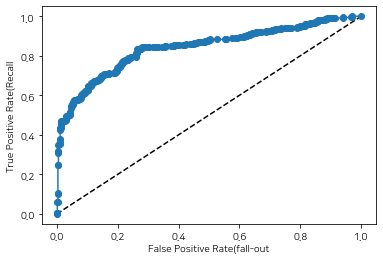

In [33]:
fpr, tpr, thresholds = roc_curve(df2["Survived"], lr_model.decision_function(df2[train_col]))

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, 'o-', label = "LogisticRegression")
plt.xlabel("False Positive Rate(fall-out")
plt.ylabel("True Positive Rate(Recall")

#1번째 array == fpr(False Positive Ratio) FP 비율 = Positive로 잘못 예측한 값의 비율
#2번째 array == tpr(True Positive Ratio) TP 비율 = Positive로 잘 예측한 값의 비율
#3번째 array == 기준선 값
#곡선이 Y축에 가까울수록 성능이 좋다는 의미

### 예제2) cancer dataset
- 좋은 성능을 뽑아내기 위한 방법에 대한 관점

In [70]:
cancer = load_breast_cancer()
cancer

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
df['class'] = pd.Series(cancer.target, dtype="category")
# dtype을 굳이 category로 할 필요는 없다. 다만, 순서라고 해도 object, int, float에선 연속적인 순서이고 category는 딱 끊어지는 순서라 보면 된다.
# 범주형, 연속형과 연관지어 생각하면 조금은 이해할 수도 있을 듯 하다.
# 여기서 category를 쓰는 이유는 숫자로 쓰지 않기 위해서다. 다만, 머신러닝은 문자 형태를 받을 수 없기 때문에 category 자료형으로 던져준 것이다.
# 즉, 숫자에 가중치를 두지 않고 분류하는 '더미변수'로 활용하기 위해 사용하는 자료형이 category다. 난 이렇게 이해함!!! 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [72]:
# target 갯수 확인. 불균형한 것을 알 수 있음
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [73]:
X = df.iloc[:, 0:-1]
y = df['class']

X.head()
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: category
Categories (2, int64): [0, 1]

In [74]:
# 훈련용 데이터와 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [75]:
# 전문적인 의료인이 아니기 때문에 좋은 변수인지 아닌지 알 수 없음
# 이럴 땐 통계의 힘을 빌려 좋은 변수와 나쁜 변수를 가려야 함

X1 = sm.add_constant(X)
X1

# const란 상수가 추가되었다. wx+b에서 b에 영향 주기 위한 상수라 보면 된다.
# 이걸 이용해서 최소제곱법(OLS) 구한다.
# 실제 값과 예측값이 가장 작게 차이가 나도록 하는 직선(회귀선)을 구하는 방법이다.

OLS_model = sm.OLS(y, X1).fit()
print(OLS_model.summary())

### P>|t| 값 0.05가 기준. 작으면 의미있는 변수, 크면 의미없는 변수
meaning_col = ['mean compactness', 'smoothness error', 'concavity error', 'worst radius', 'worst area']

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          6.05e-153
Time:                        11:30:47   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
log_reg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

In [77]:
pred = log_reg.predict(X_test)
c_mat = confusion_matrix(y_test, pred)
print(c_mat)

[[52  1]
 [ 6 84]]


In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [79]:
meaning_col = ['mean compactness', 'smoothness error', 'concavity error', 'worst radius', 'worst area']

In [80]:
Data = df[meaning_col]
target = df['class']

Data_train, Data_test, target_train, target_test = train_test_split(Data, target, random_state=0)
print(Data_train.shape, Data_test.shape, target_train.shape, target_test.shape)

OLS_model = sm.OLS(target, Data).fit()
print(OLS_model.summary())

reg = LogisticRegression(max_iter=100000).fit(Data_train, target_train)

pre = reg.predict(Data_test)
mat = confusion_matrix(target_test, pre)
print(mat)

print(classification_report(target_test, pre))

(426, 5) (143, 5) (426,) (143,)
                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              432.7
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                   2.42e-190
Time:                        11:30:55   Log-Likelihood:                         -226.37
No. Observations:                 569   AIC:                                      462.7
Df Residuals:                     564   BIC:                                      484.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
---

In [81]:
meaning_col = ["mean texture", "mean smoothness", "mean fractal dimension", "mean symmetry", 
          "compactness error", "texture error"]

Data = df[meaning_col]
target = df['class']

Data_train, Data_test, target_train, target_test = train_test_split(Data, target, random_state=0)
print(Data_train.shape, Data_test.shape, target_train.shape, target_test.shape)

Data1 = sm.add_constant(Data)
OLS_model = sm.OLS(target, Data).fit()
print(OLS_model.summary())

reg = LogisticRegression(max_iter=100000).fit(Data_train, target_train)

pre = reg.predict(Data_test)
mat = confusion_matrix(target_test, pre)
print(mat)

print(classification_report(target_test, pre))

(426, 6) (143, 6) (426,) (143,)
                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              343.6
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                   1.55e-184
Time:                        11:31:02   Log-Likelihood:                         -236.78
No. Observations:                 569   AIC:                                      485.6
Df Residuals:                     563   BIC:                                      511.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.97